In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

In [20]:
func = lambda x1,x2 :(3*x1)**2+x2**2
funcx1 = lambda x1,x2 : 6*x1
funcx2 = lambda x1,x2 : 2*x2

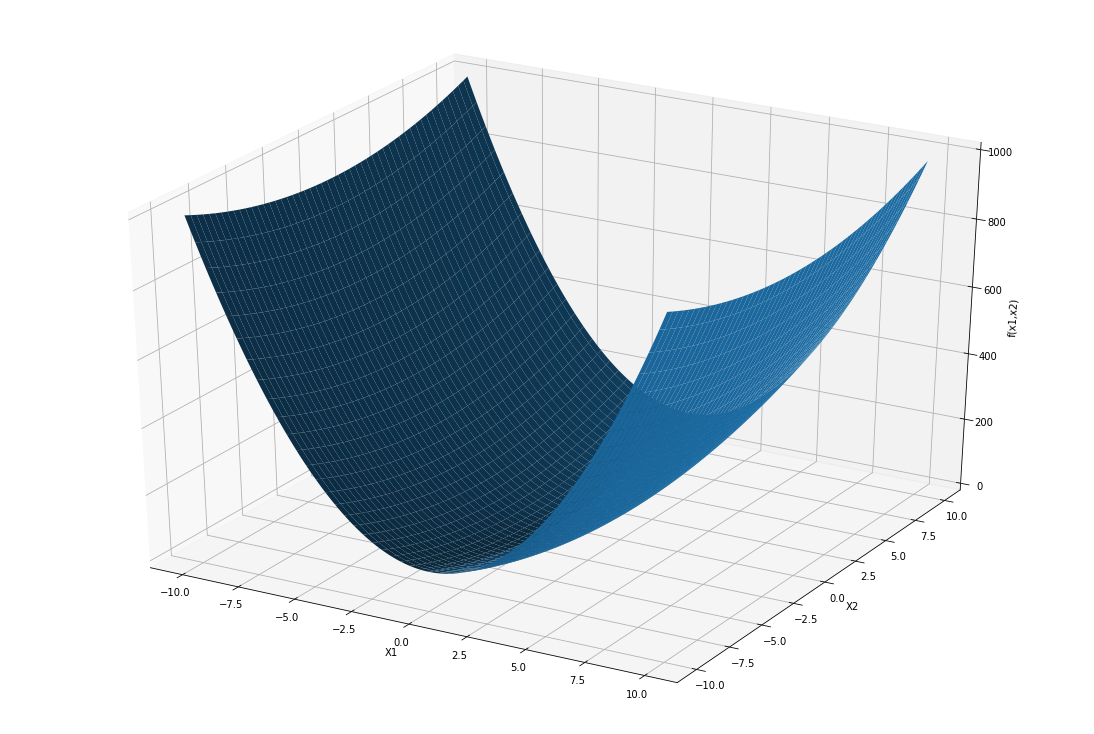

In [27]:
# x1 and x2 created for visualizing the function
x1 = np.arange(-10,10,0.1)
x2 = np.arange(-10,10,0.1)

X1,X2 = np.meshgrid(x1,x2)
f = func(X1,X2)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1,X2,f)
plt.xlabel('X1')
plt.ylabel('X2')
ax.set_zlabel('f(x1,x2)')
plt.gcf().set_size_inches(15, 10)
plt.show()

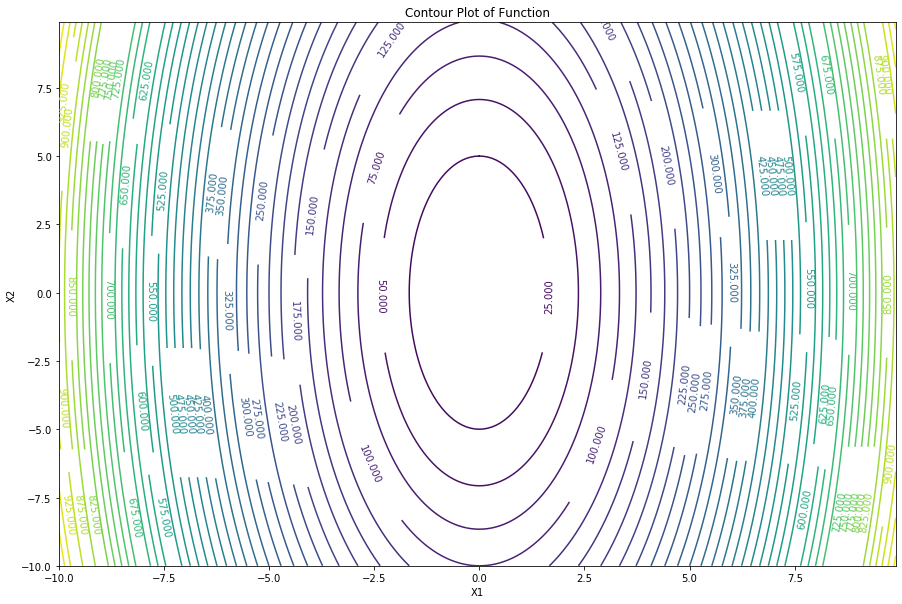

In [32]:
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,40)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)

In [33]:
"""
    GOLDEN SECTION METHOD
    It finds the local minimum point of a function in a given interval.
    
    f :     a function that is convex in the given interval.
    x_low : lower bound of the interval.
    x_up :  upper bound of the interval.
    tol :   tolerance is the stopping condition.
    max_n:  max number of iteration is also a stopping condition.
    
    return: it returns the average of final interval's bounds which is
            approximately equals to point where f(x) is minimum.
"""
def golden(f,x_low, x_up, tol, max_n):
    
    iter_ctr = 0
    while (x_up-x_low)>tol and iter_ctr<max_n:
        x_n1 = x_up - 0.618*(x_up - x_low)
        x_n2 = x_low + 0.618*(x_up - x_low)
        
        if f(x_n1) <= f(x_n2):
            x_up = x_n2
            x_n2 = x_n1
            x_n1 = x_up - 0.618*(x_up - x_low)
        else:
            x_low = x_n1
            x_n1 = x_n2
            x_n2  = x_low + 0.618*(x_up - x_low)
        iter_ctr = iter_ctr + 1
    return (x_n1 + x_n2)/2.0

In [34]:
"""
    STEEPEST DESCENT METHOD
    It finds the point which is the global minimum of the two variable
    function. => f(x1,x2)
    
    f :      function we want to find global min.
    fx1 :    partial derivative of the function f with respect to x1
    fx2 :    partial derivative of the function f with respect to x2
    ip :     initial points where the algorithm is started
    maxN:    stopping condition, max. number of iterations that algorithm will work.
    epsilon: stopping condition, when difference between the value of f(x1,x2) in 
             two consecutive iteration is smaller then epsilon, we accept that algorithm
             is converged.
    
    return:  it returns an array where every value is stored while iterating.
"""
def steepest_descent(f,fx1,fx2,ip,maxN,epsilon):
    results = []
    x1,x2 = ip
    diff = 10**10
    for i in range(maxN):
        # if differences between two consecutive iteration is smaller than epsilon
        # (which is a stopping condition) function stops.
        if diff>epsilon:
            
            # direction of movement,s1 and s2 are negative of the derivatives
            # at that point with respect to x1 and x2. s1 and s2 are the 
            # directions of the next step.
            s1 = -fx1(x1,x2)
            s2 = -fx2(x1,x2)
            
            # fd is the new function which goes trough the current point and has
            # the direction
            fd = lambda d: f(x1 + d*s1, x2 + d*s2)
            
            # dstar is the step length. It decides how big the step will be in
            # the direction of s1 and s2. Actually it is the min. value of
            dstar = golden(fd,0,100000,0.0001,100)
            new_x1 = x1 + dstar*s1
            new_x2 = x2 + dstar*s2
            diff = abs(f(x1,x2)-f(new_x1,new_x2))
            # values are stored as rounded due to the visualizing purposes.
            results.append([i,round(x1,5),round(x2,5),round(s1,5),round(s2,5),round(f(x1,x2),10),round(dstar,5),diff])
            x1 = new_x1
            x2 = new_x2
        else:
            break
    return results

In [35]:
initial = [-7.5,7.5]
sdr = steepest_descent(func,funcx1,funcx2,initial,10000,0.0001)
print(tabulate(sdr,headers=['Iteration','x1','x2','s1','s2','f(x1,x2)','dstar','diff = fnext-fcurrent']))

  Iteration        x1       x2        s1         s2       f(x1,x2)    dstar    diff = fnext-fcurrent
-----------  --------  -------  --------  ---------  -------------  -------  -----------------------
          0  -7.5      7.5      45        -15        562.5          0.17072            537.805
          1   0.18256  4.93915  -1.09534   -9.8783    24.6951       0.46679             23.6149
          2  -0.32874  0.32804   1.97244   -0.65608    1.08024      0.17072              1.03299
          3   0.008    0.21603  -0.04801   -0.43206    0.0472458    0.46665              0.0451713
          4  -0.0144   0.01441   0.08641   -0.02882    0.0020745    0.17072              0.00198335
          5   0.00035  0.00949  -0.0021    -0.01898    9.11543e-05  0.46682              8.71704e-05


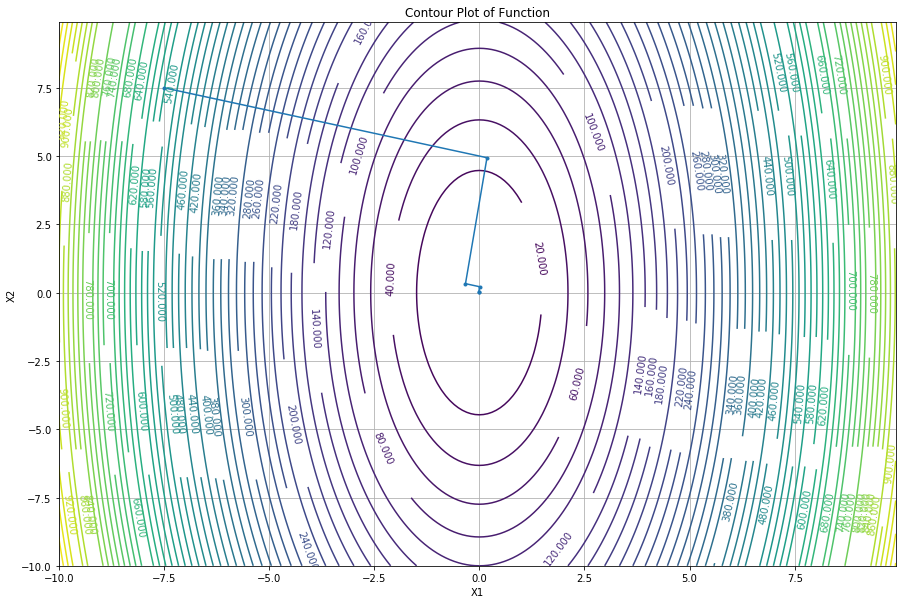

In [36]:
sdr = np.array(sdr)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-")
plt.grid()

In [37]:
initial = [9,8]
sdr = steepest_descent(func,funcx1,funcx2,initial,10000,0.00000000000000000001)
print(tabulate(sdr,headers=['Iteration','x1','x2','s1','s2','f(x1,x2)','dstar','diff = fnext-fcurrent']))

  Iteration        x1       x2         s1         s2      f(x1,x2)    dstar    diff = fnext-fcurrent
-----------  --------  -------  ---------  ---------  ------------  -------  -----------------------
          0   9        8        -54        -16        793           0.16989            764.83
          1  -0.17408  5.28175    1.0445   -10.5635    28.1697      0.47304             27.1669
          2   0.32001  0.28476   -1.92006   -0.56953    1.00275     0.16989              0.967056
          3  -0.00619  0.18801    0.03714   -0.37601    0.0356912   0.47311              0.0344232
          4   0.01138  0.01011   -0.06829   -0.02022    0.00126797  0.16989              0.00122296
          5  -0.00022  0.00668    0.00132   -0.01335    4.501e-05   0.473                4.34067e-05
          6   0.0004   0.00036   -0.00243   -0.00072    1.6033e-06  0.16989              1.54616e-06
          7  -1e-05    0.00024    5e-05     -0.00048    5.72e-08    0.47315              5.51653e-08
        

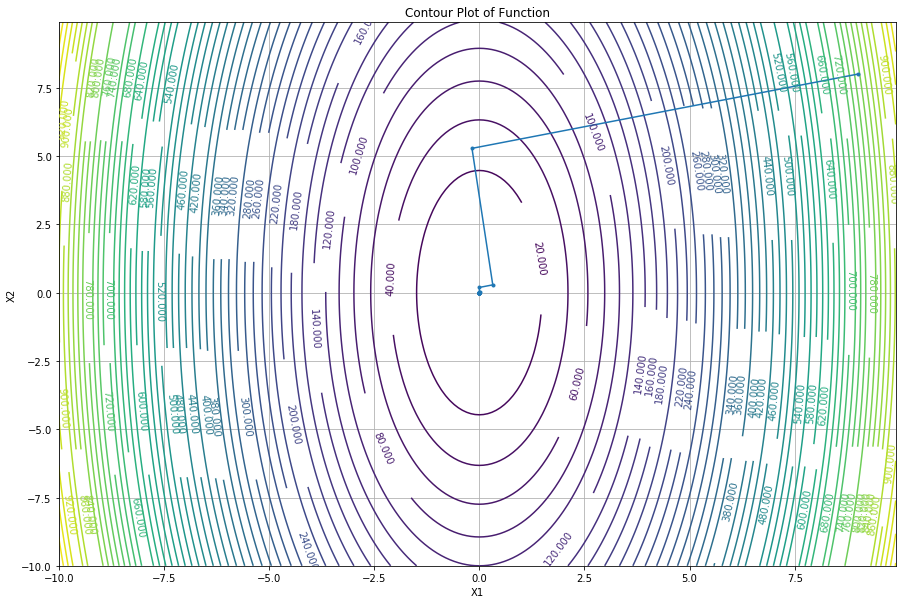

In [38]:
sdr = np.array(sdr)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-")
plt.grid()